In [19]:
#KDE(kernel Density Estimation)
import numpy as npy
import pandas as pds
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [20]:

# Generating sample data
np.random.seed(42)
x=npy.random.rand(100)*10
y=3*x+1+npy.random.normal(0,3,100)  #Linear  relation with noise
data = pds.DataFrame({'x':x,'y':y})

In [25]:
data

,x,y
0,3.745401,12.497345
1,9.507143,28.624407
2,7.319939,23.235101
3,5.986585,12.997048
4,1.560186,5.021544
...,...,...
95,4.937956,13.366437
96,5.227328,16.450680
97,4.275410,14.849686
98,0.254191,2.592646


from matplotlib import pyplot as plt
data['x'].plot(kind='hist', bins=20, title='x')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['y'].plot(kind='hist', bins=20, title='y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='x', y='y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['x'].plot(kind='line', figsize=(8, 4), title='x')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['y'].plot(kind='line', figsize=(8, 4), title='y')
plt.gca().spines[['top', 'right']].set_visible(False)

In [21]:
# splitting Data
x_train,x_test,y_train,y_test=train_test_split(data[['x']],data[['y']],test_size=0.2,random_state=42)

In [22]:
#Training a model
model = LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

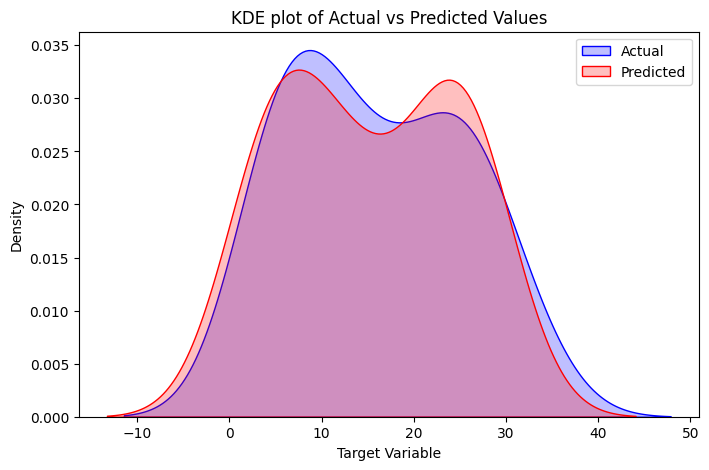

In [24]:
# plotting KDE forr  Observed vs predicted value
plt.figure(figsize=(8,5))
sns.kdeplot(y_test['y'], label='Actual', fill=True, color='blue')
sns.kdeplot(y_pred.flatten(), label='Predicted', fill=True, color='red') # Use flatten() to convert y_pred to 1D array
plt.xlabel('Target Variable')
plt.ylabel('Density')
plt.title('KDE plot of Actual vs Predicted Values')
plt.legend()
plt.show()